In [6]:
import pandas as pd

file  = './KBO_2019_player_gamestats.xlsx'
raw = pd.read_excel(file)
raw.head()

,Team,Name,DOB,Date,Opponent,Result,GS,AB,R,H,...,SH,SF,AVG,OBP,SLG,OPS,DIPS,avLI,RE24,WPA
0,Doosan,페르난데스,1988-04-27,2021-03-23,Hanhwa,W 5:4,1,4,0,2,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,Doosan,페르난데스,1988-04-27,2021-03-24,Hanhwa,L 1:11,1,2,0,0,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,Doosan,페르난데스,1988-04-27,2021-03-26,kiwoom,W 7:2,1,2,2,0,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,Doosan,페르난데스,1988-04-27,2021-03-27,kiwoom,W 3:2,1,4,1,3,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,Doosan,페르난데스,1988-04-27,2021-03-28,kiwoom,L 4:5,1,3,1,0,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


# Q) Who's performance is steady regardless of weather (esp. hot summer)
- monthly record

In [7]:
#extract only month from 'Date' and create separate 'month' column 
month_list = []
for monthdate in raw['Date']:
    month = monthdate.month
    month_list.append(month)
raw['Month'] = month_list

In [8]:
#select columns for analysis
columns_select = ['Team', 'Name', 'DOB','Date', 'Opponent','AB','H','HR', 'TB', 'RBI','BB', 'HBP', 'SF', 'Month']

data = raw[columns_select]
data.head()

,Team,Name,DOB,Date,Opponent,AB,H,HR,TB,RBI,BB,HBP,SF,Month
0,Doosan,페르난데스,1988-04-27,2021-03-23,Hanhwa,4,2,0,3,3,0,0,0,3
1,Doosan,페르난데스,1988-04-27,2021-03-24,Hanhwa,2,0,0,0,0,0,0,0,3
2,Doosan,페르난데스,1988-04-27,2021-03-26,kiwoom,2,0,0,0,1,2,0,0,3
3,Doosan,페르난데스,1988-04-27,2021-03-27,kiwoom,4,3,0,3,1,0,0,0,3
4,Doosan,페르난데스,1988-04-27,2021-03-28,kiwoom,3,0,0,0,0,2,0,0,3


In [9]:
#Using pivot table, view monthly performance  
data_player_month = data.pivot_table(index = ['Team','Name','DOB', 'Month'], 
                               values = ['AB','H','HR','TB','RBI','BB','HBP','SF'], 
                              aggfunc = 'sum', fill_value = 0
                                )
data_player_month

AB  BB   H  HBP  HR  RBI  SF  TB
Team   Name DOB        Month                                  
Doosan 국해성  1989-10-08 3       2   1   0    1   0    0   0   0
                       4       1   0   0    0   0    0   0   0
                       5      21   2   4    0   0    2   0   6
                       6       3   1   0    0   0    0   0   0
                       8       6   1   0    0   0    0   0   0
...                           ..  ..  ..  ...  ..  ...  ..  ..
lotte  허일   1992-11-20 5      71   8  18    1   0    8   0  19
                       6      24   2   6    0   0    1   0   6
                       8      10   1   2    0   0    0   0   3
                       9      18   0   4    0   0    2   0   4
       황진수  1989-02-15 5       3   1   0    0   0    0   0   0

[1261 rows x 8 columns]

In [10]:
data_player_month = data_player_month.reset_index()
data_player_month

,Team,Name,DOB,Month,AB,BB,H,HBP,HR,RBI,SF,TB
0,Doosan,국해성,1989-10-08,3,2,1,0,1,0,0,0,0
1,Doosan,국해성,1989-10-08,4,1,0,0,0,0,0,0,0
2,Doosan,국해성,1989-10-08,5,21,2,4,0,0,2,0,6
3,Doosan,국해성,1989-10-08,6,3,1,0,0,0,0,0,0
4,Doosan,국해성,1989-10-08,8,6,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1256,lotte,허일,1992-11-20,5,71,8,18,1,0,8,0,19
1257,lotte,허일,1992-11-20,6,24,2,6,0,0,1,0,6
1258,lotte,허일,1992-11-20,8,10,1,2,0,0,0,0,3
1259,lotte,허일,1992-11-20,9,18,0,4,0,0,2,0,4


In [11]:
#func to calculate AVG/OBP/SLG/OPS of a batter 
def cal_hit(df):
    '''
    - 타율 : 공을 쳐서 나가는 비율 --> 안타 / 타수
    - 출루율: 진루해서 나가는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['AVG'] = df['H'] / df['AB']
    df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['HBP'] + df['SF'])
    df['SLG'] = df['TB'] / df['AB']
    df['OPS'] = df['OBP'] + df['SLG']
    return df

In [12]:
# data_player_month  evaluate cal_hit of each batter
player_month_stat = cal_hit(data_player_month)
player_month_stat = player_month_stat.dropna()
player_month_stat

,Team,Name,DOB,Month,AB,BB,H,HBP,HR,RBI,SF,TB,AVG,OBP,SLG,OPS
0,Doosan,국해성,1989-10-08,3,2,1,0,1,0,0,0,0,0.000000,0.666667,0.000000,0.666667
1,Doosan,국해성,1989-10-08,4,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,Doosan,국해성,1989-10-08,5,21,2,4,0,0,2,0,6,0.190476,0.285714,0.285714,0.571429
3,Doosan,국해성,1989-10-08,6,3,1,0,0,0,0,0,0,0.000000,0.333333,0.000000,0.333333
4,Doosan,국해성,1989-10-08,8,6,1,0,0,0,0,0,0,0.000000,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,lotte,허일,1992-11-20,5,71,8,18,1,0,8,0,19,0.253521,0.375000,0.267606,0.642606
1257,lotte,허일,1992-11-20,6,24,2,6,0,0,1,0,6,0.250000,0.333333,0.250000,0.583333
1258,lotte,허일,1992-11-20,8,10,1,2,0,0,0,0,3,0.200000,0.300000,0.300000,0.600000
1259,lotte,허일,1992-11-20,9,18,0,4,0,0,2,0,4,0.222222,0.222222,0.222222,0.444444


In [13]:
#montly OBP
month_pivot = player_month_stat.pivot_table(index = ['Team','Name','DOB'],
                             columns = 'Month',
                             values = 'OBP')
month_pivot = month_pivot.reset_index()
month_pivot

Month,Team,Name,DOB,3,4,5,6,7,8,9,10
0,Doosan,국해성,1989-10-08,0.666667,0.000000,0.285714,0.333333,NaN,0.166667,1.000000,0.500000
1,Doosan,김경호,1995-07-31,NaN,NaN,0.153846,0.333333,NaN,0.142857,NaN,NaN
2,Doosan,김대한,2000-12-06,0.333333,0.200000,0.142857,NaN,NaN,NaN,NaN,NaN
3,Doosan,김인태,1994-07-03,NaN,0.000000,0.333333,NaN,NaN,0.250000,0.384615,0.500000
4,Doosan,김재호,1985-03-21,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
224,lotte,정준혁,1994-04-01,NaN,NaN,NaN,0.333333,NaN,NaN,0.142857,1.000000
225,lotte,정훈,1987-07-18,0.000000,0.428571,0.375000,0.384615,0.333333,0.333333,0.326531,0.250000
226,lotte,채태인,1982-10-11,0.409091,0.230769,0.279070,NaN,0.571429,0.350000,NaN,NaN
227,lotte,허일,1992-11-20,NaN,0.346154,0.375000,0.333333,NaN,0.300000,0.222222,NaN


In [17]:
#import batter performance data of seasons
import pandas as pd

file  = './player_stat.xlsx'
player_stat = pd.read_excel(file)
player_stat.head()

,Team,Name,DOB,TB,BB,HBP,H,AB,RBI,HR,SF,AVG,OBP,SLG,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.500000,0.645161,1.145161
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.487234,0.484649,0.971883
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.486747,0.571066,1.057813
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.472973,0.495434,0.968407
4,kiwoom,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.465863,0.557895,1.023758


In [26]:
#change player_stat DOB column Dtype to datetime64 before merging 
player_stat['DOB'] = pd.to_datetime(player_stat['DOB'])

In [25]:
df = pd.merge(player_stat, month_pivot, how = 'left', left_on = ['Team','Name','DOB'], right_on = ['Team','Name','DOB'])
df.head(10)

,Team,Name,DOB,TB,BB,HBP,H,AB,RBI,HR,...,SLG,OPS,3,4,5,6,7,8,9,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.145161,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.971883,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.057813,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.968407,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,kiwoom,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,1.023758,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
5,Samsung,러프,1986-07-28,243,80,7,138,472,101,22,...,0.514831,0.975896,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
6,NC,박석민,1985-06-22,172,65,12,96,364,74,19,...,0.472527,0.928992,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
7,Hanhwa,최재훈,1989-08-27,135,56,14,108,373,31,3,...,0.361930,0.817173,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
8,kiwoom,샌즈,1987-09-28,296,86,6,170,568,119,28,...,0.521127,0.973631,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
9,Doosan,김재호,1985-03-21,139,69,8,105,385,51,4,...,0.361039,0.811534,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


In [28]:
#display players with top 50 'OBP' 
df_sort = df.sort_values(by = 'OBP', ascending = False).head(50)
df_sort

,Team,Name,DOB,TB,BB,HBP,H,AB,RBI,HR,...,SLG,OPS,3,4,5,6,7,8,9,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.145161,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.971883,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.057813,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.968407,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,kiwoom,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,1.023758,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
5,Samsung,러프,1986-07-28,243,80,7,138,472,101,22,...,0.514831,0.975896,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
6,NC,박석민,1985-06-22,172,65,12,96,364,74,19,...,0.472527,0.928992,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
7,Hanhwa,최재훈,1989-08-27,135,56,14,108,373,31,3,...,0.361930,0.817173,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
8,kiwoom,샌즈,1987-09-28,296,86,6,170,568,119,28,...,0.521127,0.973631,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
9,Doosan,김재호,1985-03-21,139,69,8,105,385,51,4,...,0.361039,0.811534,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


In [34]:
df_selected = df_sort[['Team', 'Name', 'OBP', 3, 4, 5, 6, 7, 8, 9, 10]]
df_selected

,Team,Name,OBP,3,4,5,6,7,8,9,10
0,NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,kiwoom,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
5,Samsung,러프,0.461066,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
6,NC,박석민,0.456464,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
7,Hanhwa,최재훈,0.455243,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
8,kiwoom,샌즈,0.452504,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
9,Doosan,김재호,0.450495,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


apply 'Heatmap' 
- index changed to 'Team and Name'

In [35]:
df_selected = df_selected.set_index(['Team','Name'])
df_selected

,,OBP,3,4,5,6,7,8,9,10
Team,Name,,,,,,,,,
NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
kiwoom,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
Samsung,러프,0.461066,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
NC,박석민,0.456464,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
Hanhwa,최재훈,0.455243,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
kiwoom,샌즈,0.452504,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860


In [44]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Player name is in Korean, following code is required to display korean character
if platform.system() == 'Windows':  # windows
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac
    rc('font', family='AppleGothic')

# #그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
# matplotlib.rcParams['axes.unicode_minus'] = False   

<AxesSubplot:ylabel='Team-Name'>

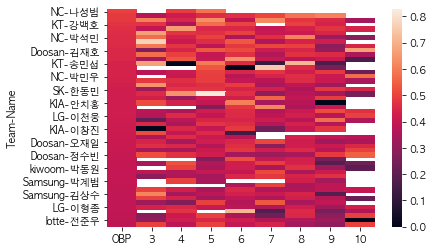

In [45]:
sns.heatmap(df_selected)

<AxesSubplot:ylabel='Team-Name'>

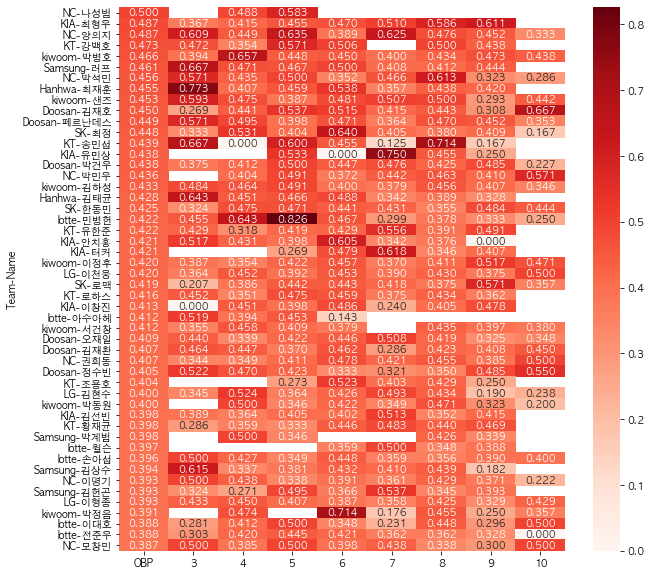

In [46]:
fig, ax = plt.subplots( figsize=(10,10) )
sns.heatmap(data = df_selected, 
            annot = True, fmt = '.3f', 
            cmap = 'Reds'
           )

In [49]:
for col in df_selected.columns[1:]:
    df_selected[col] = df_selected[col]  - df_selected['OBP'] 
df_selected['OBP'] = 0.0
df_selected

,,OBP,3,4,5,6,7,8,9,10
Team,Name,,,,,,,,,
NC,나성범,0.0,NaN,-0.012195,0.083333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.0,-0.120567,-0.072600,-0.031788,-0.017355,0.022570,0.098973,0.123877,NaN
NC,양의지,0.0,0.121949,-0.038029,0.148388,-0.097858,0.138253,-0.010557,-0.035134,-0.153414
KT,강백호,0.0,-0.000751,-0.118806,0.098456,0.033051,NaN,0.027027,-0.035473,NaN
kiwoom,박병호,0.0,-0.071924,0.190853,-0.017947,-0.015863,-0.065863,-0.031520,0.006864,-0.028363
Samsung,러프,0.0,0.205601,0.010363,0.005601,0.038934,-0.052615,-0.049301,-0.016621,NaN
NC,박석민,0.0,0.114964,-0.021682,0.043536,-0.104352,0.009289,0.156439,-0.133884,-0.170750
Hanhwa,최재훈,0.0,0.317484,-0.047836,0.004216,0.083219,-0.098100,-0.017743,-0.034953,NaN
kiwoom,샌즈,0.0,0.140088,0.022743,-0.065712,0.028508,0.054742,0.047496,-0.159401,-0.010644


<AxesSubplot:ylabel='Team-Name'>

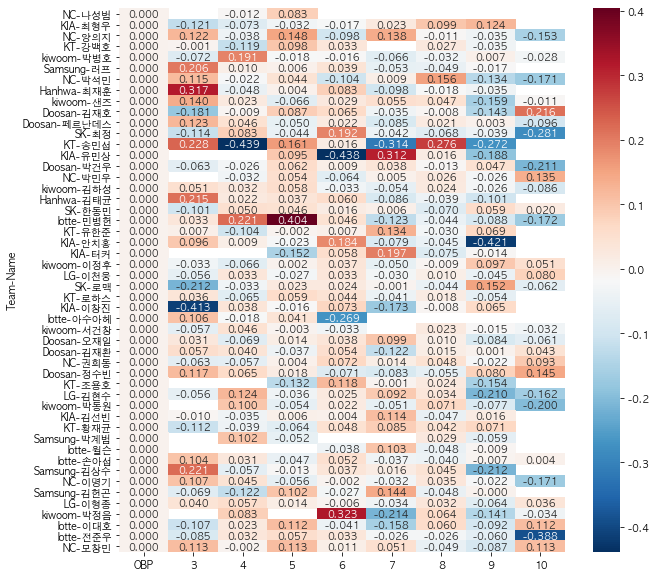

In [50]:
#color map Blue ~ Red = RdBu_r 
# season/month OBP performance analysis 

fig, ax = plt.subplots( figsize=(10,10) )

sns.heatmap(data = df_selected.head(50), 
            annot = True, fmt = '.3f', 
            cmap = 'RdBu_r'
           )